In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_url = "https://raw.githubusercontent.com/IamAbhiKaushik/ml_database/master/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(data_url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# The next step is to split our dataset into its attributes and labels. To do so, use the following code:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [5]:
# To create training and test splits, execute the following script:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [7]:
"""
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics.
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
Take a look at the following script:
"""
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  1]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Now what are these parameters? 
Precision is the ability of a classiifer not to label an instance positive that is actually negative. 
For each class it is defined as as the ratio of true positives to the sum of true and false positives.
Said another way, “for all instances classified positive, what percent was correct?”

# Recall
Recall is the ability of a classifier to find all positive instances. 
For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. 
Said another way, “for all instances that were actually positive, what percent was classified correctly?”

# The F1 score 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.
As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

# Support
Support is the number of actual occurrences of the class in the specified dataset. 
Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier 
and could indicate the need for stratified sampling or rebalancing. 
Support doesn’t change between models but instead diagnoses the evaluation process.

For any doubts regarding Macro - Micro averages, visit https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin


In [10]:
#Insight
#Comparing Error Rate with the K Value In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

#One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset. In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40. To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [11]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


In [12]:
#The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list. 
#The next step is to plot the error values against K values. 
#Execute the following script to create the plot:


Text(0, 0.5, 'Mean Error')

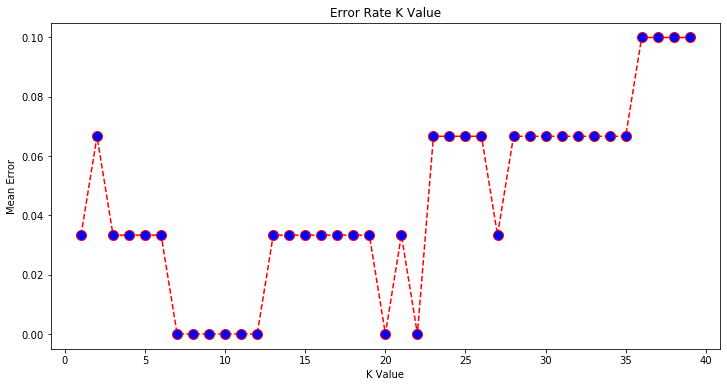

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
